In [17]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [18]:
len(train_data)
len(test_data)

2246

In [19]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [23]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoder_newswire = " ".join([reverse_word_index.get(i-3,'?')for i in train_data[0]])


In [22]:
train_labels[0]

3

In [24]:
import numpy as np 
 
def vectorize_sequences(sequences, dimension=10000):     
    results = np.zeros((len(sequences), dimension))     
    for i, sequence in enumerate(sequences):         
        results[i, sequence] = 1.     
        return results 
 
x_train = vectorize_sequences(train_data)   
x_test = vectorize_sequences(test_data)

In [25]:
def to_one_hot(labels, dimension=46):     
    results = np.zeros((len(labels), dimension))     
    for i, label in enumerate(labels):         
        results[i, label] = 1.     
        return results 
 
one_hot_train_labels = to_one_hot(train_labels)   
one_hot_test_labels = to_one_hot(test_labels) 

In [26]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [29]:
model.compile(optimizer='rmsprop',               
              loss='categorical_crossentropy',               
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_val = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_val = one_hot_train_labels[1000:]


In [33]:
history = model.fit(partial_x_val,
                    partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 425us/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 2/20
7982/7982 [==============================] - 3s 409us/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 3/20
7982/7982 [==============================] - 4s 456us/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 4/20
7982/7982 [==============================] - 4s 477us/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 5/20
7982/7982 [==============================] - 3s 392us/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 6/20
7982/7982 [==============================] - 3s 401us/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9990
Epoch 7/20
7982/7982 [==============================] - 4s 439us/step - loss: 0.0000e+00 - acc: 1.0000 - val_los

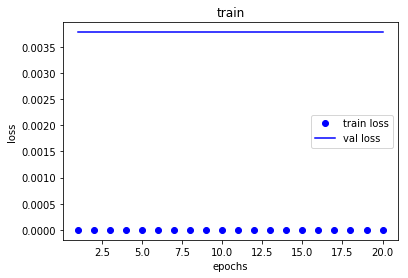

In [35]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label = 'train loss')
plt.plot(epochs,val_loss,'b',label = 'val loss')
plt.title('train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [36]:
prediction = model.predict(x_test)
prediction

array([[0.02151986, 0.02193134, 0.0204662 , ..., 0.021364  , 0.02229546,
        0.02041148],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       ...,
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913],
       [0.02173913, 0.02173913, 0.02173913, ..., 0.02173913, 0.02173913,
        0.02173913]], dtype=float32)

In [37]:
np.argmax(prediction[0])


33